In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv")

In [3]:
data

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [7]:
data.isnull().value_counts()

patientid  age    gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  noofmajorvessels  target
False      False  False   False      False      False            False              False            False         False          False    False  False             False     1000
Name: count, dtype: int64

In [24]:
data.drop("patientid", axis=1, inplace=True)

In [26]:
data.iloc[:,:12]

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,1,2,171,0,0,1,147,0,5.3,3,3
1,40,1,0,94,229,0,1,115,0,3.7,1,1
2,49,1,2,133,142,0,0,202,1,5.0,1,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2
4,31,1,1,199,0,0,2,136,0,5.3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,1,2,139,349,0,2,183,1,5.6,2,2
996,47,1,3,143,258,1,1,98,1,5.7,1,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2


In [28]:
data.iloc[:,12]

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Name: target, Length: 1000, dtype: int64

In [29]:
data.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

In [30]:
X = data.iloc[:,:12]
y = data.iloc[:,12]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [32]:
import lightgbm as igb

In [33]:
clf = igb.LGBMClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

[LightGBM] [Info] Number of positive: 476, number of negative: 324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.595000 -> initscore=0.384674
[LightGBM] [Info] Start training from score 0.384674
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [34]:
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
clf_predict = clf.predict(X_test)
clf_predict
cr = classification_report(y_test, clf_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        96
           1       0.98      0.99      0.99       104

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



Text(50.722222222222214, 0.5, 'Actual value')

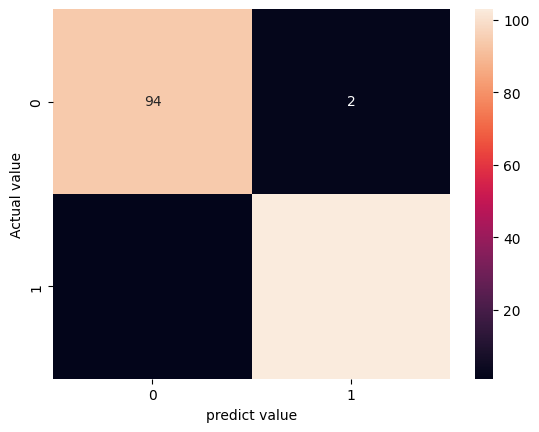

In [35]:
cm = confusion_matrix(y_test, clf_predict)
sns.heatmap(cm,annot=True)
plt.xlabel("predict value")
plt.ylabel("Actual value")

In [36]:
import joblib
joblib.dump(clf, 'Model/Cardiovascular.joblib')

['Model/Cardiovascular.joblib']

In [37]:
clf.predict([[40,]])

array([1], dtype=int64)

In [38]:
data.head(3)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0


In [1]:
import joblib

In [2]:
model = joblib.load("Model/Cardiovascular.joblib")

In [3]:
joblib.dump(model, 'Model/Cardiovascular2.pkl')

['Model/Cardiovascular2.pkl']